**import libraries**

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**import dataset**

In [61]:
data = pd.read_csv('teleCust.csv')
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [62]:
data.drop(['employ'], axis = 1 , inplace = True)

In [63]:
data.head()

,region,tenure,age,marital,address,income,ed,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,0.0,0,2,1
1,3,11,33,1,7,136.0,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0.0,1,1,1
4,2,23,30,1,9,30.0,1,0.0,0,4,3


**Data Preprocessing**



In [64]:
data.describe()

,region,tenure,age,marital,address,income,ed,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,1.000000,1.000000,8.000000,4.000000


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   retire   1000 non-null   float64
 8   gender   1000 non-null   int64  
 9   reside   1000 non-null   int64  
 10  custcat  1000 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 86.1 KB


In [66]:
data.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

**corelation map**

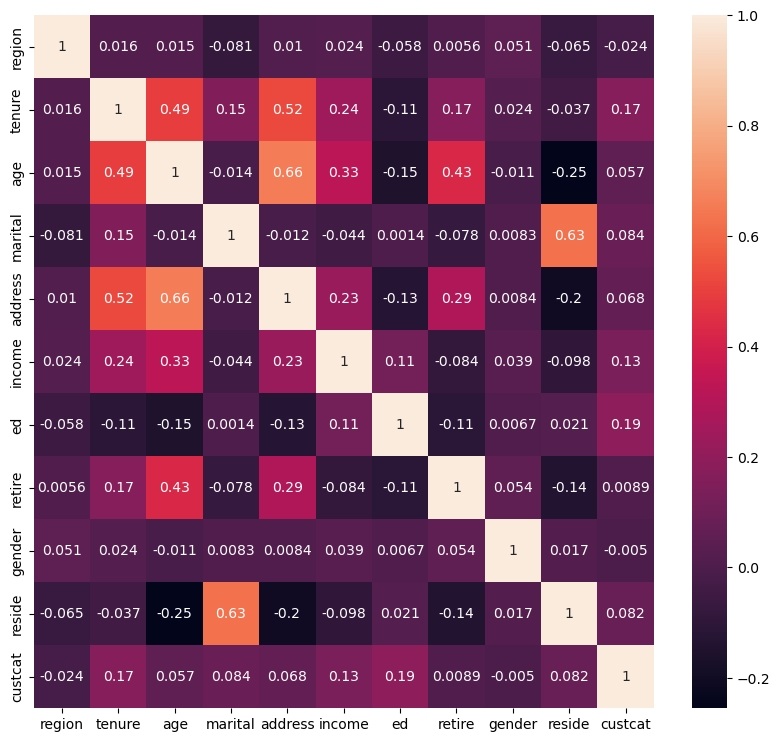

In [67]:
plt.figure(figsize = (10,9))
sns.heatmap(data.corr(),annot = True)
plt.show()

In [68]:
data.drop(['retire','gender'] , axis = 1 , inplace = True)

In [69]:
data.head()

,region,tenure,age,marital,address,income,ed,reside,custcat
0,2,13,44,1,9,64.0,4,2,1
1,3,11,33,1,7,136.0,5,6,4
2,3,68,52,1,24,116.0,1,2,3
3,2,33,33,0,12,33.0,2,1,1
4,2,23,30,1,9,30.0,1,4,3


In [70]:
region = pd.get_dummies(data['region'],drop_first=True, prefix = "region")
reside = pd.get_dummies(data['reside'],drop_first=True, prefix = "reside")


In [71]:
data.drop(['region','reside'],axis=1,inplace=True)


In [72]:
data = pd.concat([data, region, reside], axis=1)


In [73]:
data.head()

,tenure,age,marital,address,income,ed,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,13,44,1,9,64.0,4,1,1,0,1,0,0,0,0,0,0
1,11,33,1,7,136.0,5,4,0,1,0,0,0,0,1,0,0
2,68,52,1,24,116.0,1,3,0,1,1,0,0,0,0,0,0
3,33,33,0,12,33.0,2,1,1,0,0,0,0,0,0,0,0
4,23,30,1,9,30.0,1,3,1,0,0,0,1,0,0,0,0


**Standardisation of variables**

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
Scaled_variable = data[['tenure','age', 'address', 'income' , 'ed']]

In [76]:
Scaled_variable

,tenure,age,address,income,ed
0,13,44,9,64.0,4
1,11,33,7,136.0,5
2,68,52,24,116.0,1
3,33,33,12,33.0,2
4,23,30,9,30.0,1
...,...,...,...,...,...
995,10,39,0,27.0,3
996,7,34,2,22.0,5
997,67,59,40,944.0,5
998,70,49,18,87.0,2


In [77]:
scaler = StandardScaler()

In [78]:
scaler.fit(Scaled_variable)

StandardScaler()

In [79]:
Scaled_variable = scaler.transform(Scaled_variable)

In [80]:
Scaled_variable.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [81]:
df_scaled = pd.DataFrame(Scaled_variable, columns = ['tenure','age', 'address', 'income' , 'ed'])

In [82]:
df_scaled.head()

,tenure,age,address,income,ed
0,-1.055125,0.184505,-0.253034,-0.126506,1.087753
1,-1.148806,-0.691812,-0.451415,0.546450,1.906227
2,1.521092,0.821826,1.234819,0.359517,-1.367671
3,-0.118319,-0.691812,0.044536,-0.416251,-0.549196
4,-0.586722,-0.930808,-0.253034,-0.444291,-1.367671


In [83]:
data.head()

,tenure,age,marital,address,income,ed,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,13,44,1,9,64.0,4,1,1,0,1,0,0,0,0,0,0
1,11,33,1,7,136.0,5,4,0,1,0,0,0,0,1,0,0
2,68,52,1,24,116.0,1,3,0,1,1,0,0,0,0,0,0
3,33,33,0,12,33.0,2,1,1,0,0,0,0,0,0,0,0
4,23,30,1,9,30.0,1,3,1,0,0,0,1,0,0,0,0


In [84]:
data.drop(['tenure','age', 'address', 'income' , 'ed'] , axis = 1, inplace = True)

In [85]:
data.head()



,marital,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,1,1,1,0,1,0,0,0,0,0,0
1,1,4,0,1,0,0,0,0,1,0,0
2,1,3,0,1,1,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,0
4,1,3,1,0,0,0,1,0,0,0,0


In [86]:
data = pd.concat([data , df_scaled] , axis = 1)

In [87]:
data.head()




,marital,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8,tenure,age,address,income,ed
0,1,1,1,0,1,0,0,0,0,0,0,-1.055125,0.184505,-0.253034,-0.126506,1.087753
1,1,4,0,1,0,0,0,0,1,0,0,-1.148806,-0.691812,-0.451415,0.546450,1.906227
2,1,3,0,1,1,0,0,0,0,0,0,1.521092,0.821826,1.234819,0.359517,-1.367671
3,0,1,1,0,0,0,0,0,0,0,0,-0.118319,-0.691812,0.044536,-0.416251,-0.549196
4,1,3,1,0,0,0,1,0,0,0,0,-0.586722,-0.930808,-0.253034,-0.444291,-1.367671


**Modelling**

In [90]:
X = data.drop(['custcat'] , axis = 1)
y = data['custcat']

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
k = 4
knn_model = KNeighborsClassifier(n_neighbors = k)
knn_model.fit(X_train,y_train)
knn_model

KNeighborsClassifier(n_neighbors=4)

In [94]:
y_pred = knn_model.predict(X_test)

In [95]:
from sklearn import metrics
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 0.325


**Hyper parameter optimization**

In [96]:
from sklearn.model_selection import GridSearchCV


In [97]:
knn_model3 = KNeighborsClassifier()


In [99]:
knn_params = {"n_neighbors": np.arange(1,50),
              "metric" : ["minkowski", "euclidean", "manhattan"],
              "weights" : ["uniform", "distance"]}


In [100]:
knn_cv_model = GridSearchCV(estimator = knn_model3, param_grid = knn_params, cv = 10)


In [101]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [102]:
knn_cv_model.best_params_

{'metric': 'minkowski', 'n_neighbors': 49, 'weights': 'uniform'}

In [103]:
knn_tuned = KNeighborsClassifier(n_neighbors = 49)


In [104]:
knn_tuned.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=49)

In [105]:
KNeighborsClassifier(n_neighbors=49)



KNeighborsClassifier(n_neighbors=49)

In [106]:
y_pred = knn_tuned.predict(X_test)


In [107]:
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 0.44
